In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("robinreni/signature-verification-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\DELL\.cache\kagglehub\datasets\robinreni\signature-verification-dataset\versions\2


In [3]:
train_path = path +'/sign_data/train'

# Run into every folder in the path to get the jpg
real_train_images = []
forge_train_images = []
for folder in os.listdir(train_path):
    for file in os.listdir(os.path.join(train_path, folder)):
        if file.endswith(".png" or ".PNG"):
            img = cv2.imread(os.path.join(train_path, folder, file), cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (128, 128))
            if folder.endswith("_forg"):
                forge_train_images.append(img)
            else:
                real_train_images.append(img)

# Convert the lists to numpy arrays
real_train_images = np.array(real_train_images)
forge_train_images = np.array(forge_train_images)

# Normalize the data
real_train_images = real_train_images.astype('float32') / 255.0
forge_train_images = forge_train_images.astype('float32') / 255.0

print(len(real_train_images))
print(len(forge_train_images))

648
123


In [4]:
real_labels = np.zeros(len(real_train_images), dtype=int)
forge_labels = np.ones(len(forge_train_images), dtype=int)

images = np.concatenate((real_train_images, forge_train_images), axis=0)
labels = np.concatenate((real_labels, forge_labels), axis=0)

In [5]:
# create dummy data
X_train = np.random.rand(40, 128, 128)

# add another dimension to the array
X_train = np.expand_dims(X_train, axis=-1)

# reshape the array
X_train = X_train.reshape(X_train.shape[0], 128, 128, 1)

print(X_train.shape)  # output: (40, 128, 128, 1)

(40, 128, 128, 1)


In [6]:
# create dummy data
x_test = np.random.rand(40, 128, 128)

# add another dimension to the array
x_test = np.expand_dims(x_test, axis=-1)

# reshape the array
x_test = X_train.reshape(x_test.shape[0], 128, 128, 1)

print(X_train.shape)  # output: (40, 128, 128, 1)

(40, 128, 128, 1)


In [7]:
model = Sequential()

#Flattening the input
model.add(Flatten(input_shape=(128,128,1)))

#Adding the hidden layers along with dropouts
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(32,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(16,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(1,activation='sigmoid'))
model.summary()

c:\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,109,121 (8.05 MB)

 Trainable params: 2,108,641 (8.04 MB)

 Non-trainable params: 480 (1.88 KB)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.5002 - loss: 0.8960 - val_accuracy: 0.8323 - val_loss: 3.8688
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5079 - loss: 0.8138 - val_accuracy: 0.8323 - val_loss: 3.5940
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.5896 - loss: 0.7439 - val_accuracy: 0.8323 - val_loss: 3.1463
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.6316 - loss: 0.6936 - val_accuracy: 0.8323 - val_loss: 2.8684
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.5879 - loss: 0.6775 - val_accuracy: 0.8323 - val_loss: 2.8891
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.6872 - loss: 0.6301 - val_accuracy: 0.8323 - val_loss: 2.2542
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7006 - loss: 0.6164 - val_accuracy: 0.8323 - val_loss: 1.6387
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7505 - loss: 0.5502 - val_accuracy: 0.

In [9]:
model.save('../models/ANN.h5')

In [10]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)
print("Test loss:", test_loss)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3116 - loss: 1.5061 
Test accuracy: 0.29032257199287415
Test loss: 1.5495054721832275


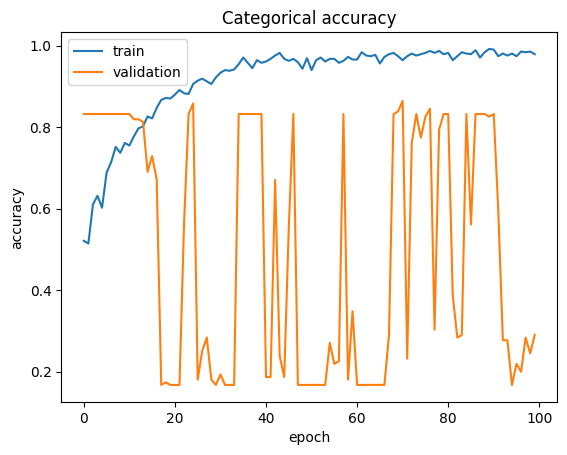

In [11]:
def plot_hist(hist):
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Categorical accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

plot_hist(history)

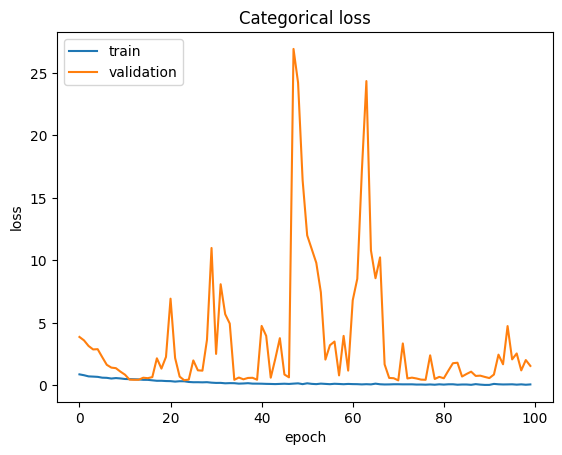

In [12]:
def plot_hist(hist):
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Categorical loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

plot_hist(history)

In [13]:
def predict_signature(image_path, model):
    """Predicts whether a signature is real or forged.

    Args:
        image_path: The path to the image file.
        model: The trained signature verification model.

    Returns:
        A string indicating whether the signature is real or forged.
    """

    # Load and preprocess the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Show image
    plt.imshow(img, cmap='gray')
    plt.title('Signature Image')
    plt.axis('off')
    plt.show()

    # Resize, reshape and normalize the input image
    img = cv2.resize(img, (128, 128))
    img = np.array(img).reshape(1, 128, 128, 1) / 255.0

    # Predict the class of the signature image
    prediction = model.predict(img)
    print(prediction)

    # Determine the prediction label
    if prediction < 0.5:
        return "The signature is real."
    else:
        return "The signature is forged."


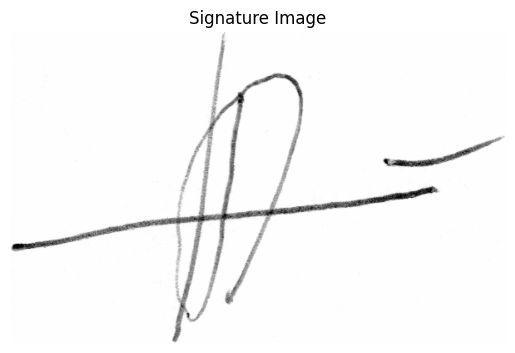

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
[[0.9221908]]
The signature is forged.


In [14]:
image_path = path + '/sign_data/test/063_forg/01_0104063.PNG'

prediction_result = predict_signature(image_path, model)
print(prediction_result)